# Data Analysis Interview Challenge
## Part 1 ‐ Exploratory data analysis
The logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#Load and store the json file in a dataframe
df = pd.read_json('logins.json')
df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [3]:
df.login_time.min()

Timestamp('1970-01-01 20:12:16')

In [4]:
df.login_time.max()

Timestamp('1970-04-13 18:57:38')

In [5]:
# Convert login_time to datetime
df['login_time'] = pd.to_datetime(df['login_time'])


In [6]:
# Round timestamps to nearest 15-minute interval
df['login_time'] = df['login_time'].dt.round('15min')

In [7]:
login_counts = df.groupby('login_time').size()
login_counts.count()

9376

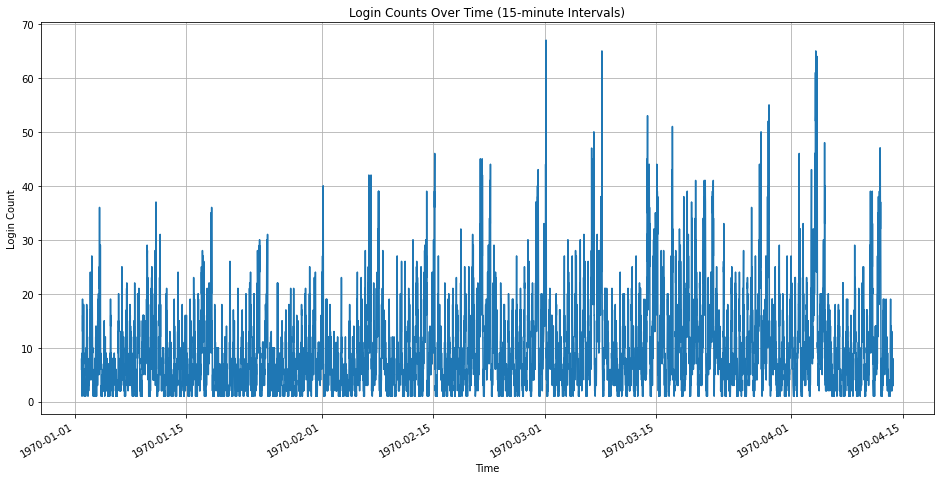

In [8]:
# Visualize the time series
login_counts.plot(kind='line', figsize=(16, 8))
plt.title('Login Counts Over Time (15-minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Login Count')
plt.grid(True)
plt.show()

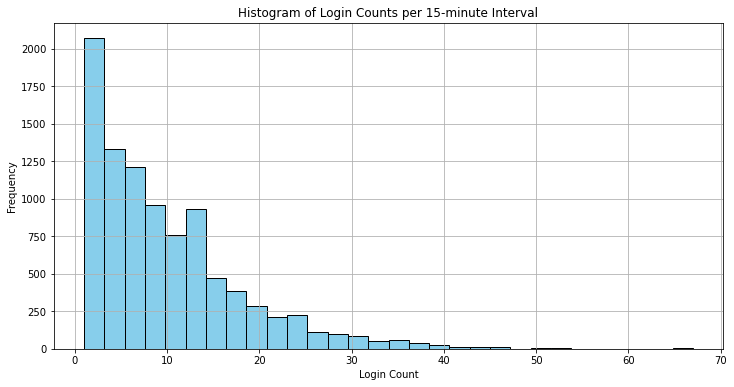

In [9]:
# Histogram of login counts per 15-minute interval
plt.figure(figsize=(12, 6))
plt.hist(login_counts, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Login Counts per 15-minute Interval')
plt.xlabel('Login Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

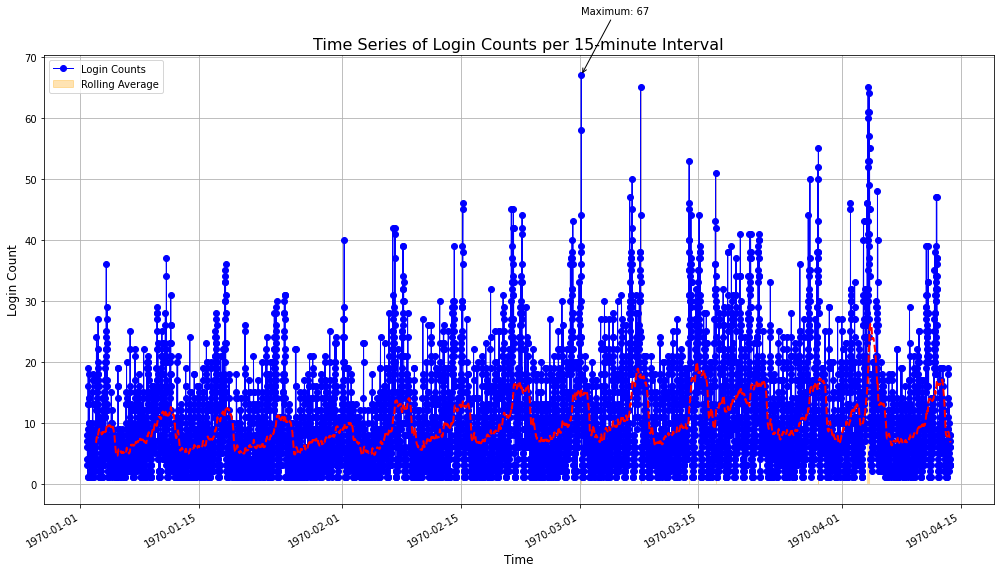

In [10]:
# Customize the time series plot
plt.figure(figsize=(14, 8))

# Plot login counts
login_counts.plot(kind='line', color='blue', marker='o', linestyle='-', linewidth=1)

# Highlight peak periods
# highlight login counts above a certain threshold
peak_threshold = 50  # Adjust as needed
peak_mask = login_counts > peak_threshold
plt.fill_between(login_counts.index, login_counts, where=peak_mask, color='orange', alpha=0.3)

# Add annotations or labels
# annotate the maximum login count
max_count = login_counts.max()
max_index = login_counts.idxmax()
plt.annotate(f'Maximum: {max_count}', xy=(max_index, max_count), xytext=(max_index, max_count + 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# Add rolling average
rolling_avg = login_counts.rolling(window=24*4).mean()  # 24 hours * 4 quarters per hour
rolling_avg.plot(kind='line', color='red', linestyle='--', linewidth=2, label='Rolling Average')

# Customize title and labels
plt.title('Time Series of Login Counts per 15-minute Interval', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Login Count', fontsize=12)
plt.grid(True)

# Customize legend and ticks
plt.legend(['Login Counts', 'Rolling Average'], loc='upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


Looks like 15 counts in every 15 mintues could be a good threshhold to make any assumptions based on more information. 

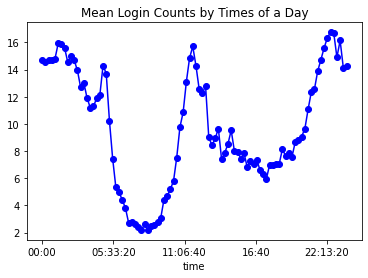

In [11]:
mean_by_time = login_counts.groupby(login_counts.index.time).mean()
mean_by_time.plot(title='Mean Login Counts by Times of a Day', marker='o', linestyle='-', color='blue')
plt.show()

## Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
#### 1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

A. For this experiment, I would choose the quantitative measure i.e the proportion of drivers over a week as the key measure of success. The reason behing choosing this metric is that this can help us calculate the average drivers who drove accross both cities so we can perform statistical tets to carry out the efficiency of our experimentation.


#### 2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

#### - a) how you will implement the experiment

A. To implement the experiment I will divide the drivers into two equal group, by randomly assigning drivers to both groups and will reimburse the 7 day tolls to one group and the other group will keep driving on the previous terms without any reimbursement. By the end of our experimentation we can calculate the significant difference between the drivers and their sentiments by conducting different testings so that we can actually make a conclusion. 

#### - b) what statistical test(s) you will conduct to verify the significance of the observation

A. We can conduct hypothesis testing to verify the significance of the observation. 

Null hypothesis: There is no significant increase in revenue after the implementation of the plan.

Then i can choose a random sample of the metric, regardless of the groups they were assigned to and calculate the mean. We can use 5 % significance level and decide whether we have to accept or reject the null hypothesis.


#### - c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

A. Based on the above experimentation, If less than 5% of the samples showed a mean metric, I would say that the difference is significant and that reimbursing toll costs would result in more drivers being available in both cities. If this was the case I would recommend that the city operations team should provide toll reimbursment to drivers. However this is subject to the profit and overall goals of the team. The down side is the revenue lost to reimbursment. The city wants to maximize the profit so they should look into further factors i.e they can provide more incentives and reimbursements to the divers who are most likely to churn. This can be calculated by a predictive model and would help the city in further decision making. The up side is the added profit from more rides and the added brand value of lower wait times for riders.

## Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

### Data description
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYYMMDD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

## EDA and Feature Engineering

In [12]:
rider_data = pd.read_json('ultimate_data_challenge.json')
rider_data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [13]:
rider_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [14]:
rider_data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [15]:
rider_data.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

There are missing values the following coloumns. Let's see if we can use these coloumns for the predction of our model or we can drop them
- avg_rating_of_driver
- phone
- avg_rating_by_driver



In [16]:
rider_data.isna()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False,False,False
49996,False,False,False,True,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
rider_data.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

This is a binary classification problem and we want to predict either a user retained or not. Assuming if the user stayed for 30 days or more that used retained.

Now lets calculate the duration of the user activity.

In [18]:
#convert the datatypes to datetime
rider_data['signup_date'] = pd.to_datetime(rider_data['signup_date'])
rider_data['last_trip_date'] = pd.to_datetime(rider_data['last_trip_date'])

In [19]:
#calculate the duration of the stay and store it as a new column
duration = rider_data['last_trip_date'] - rider_data['signup_date']
rider_data['duration'] = duration
rider_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1 days
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47 days


We can now create our target variable which is retained based on the assumption that the user is most likely to be active in the 6th month of service if they have completed a trip in the past 30 days ie after 2014-06-01.

If a user last trip date is after 2014-06-01, that user retained.

In [20]:
#rider_data['retained'] = (duration >= pd.Timedelta(days=30)).astype(int)
#rider_data.head()

#df['active_in_6th_month'] = (df['last_trip_date'] >= pd.Timestamp('2014-06-01')).astype(int)

last_active = rider_data['last_trip_date'].max() - pd.Timedelta(days=30)
print(f'target = (last_trip_date >= {last_active}).')
rider_data['retained'] = (rider_data.last_trip_date >= last_active).astype(int)

target = (last_trip_date >= 2014-06-01 00:00:00).


In [21]:
rider_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   city                    50000 non-null  object         
 1   trips_in_first_30_days  50000 non-null  int64          
 2   signup_date             50000 non-null  datetime64[ns] 
 3   avg_rating_of_driver    41878 non-null  float64        
 4   avg_surge               50000 non-null  float64        
 5   last_trip_date          50000 non-null  datetime64[ns] 
 6   phone                   49604 non-null  object         
 7   surge_pct               50000 non-null  float64        
 8   ultimate_black_user     50000 non-null  bool           
 9   weekday_pct             50000 non-null  float64        
 10  avg_dist                50000 non-null  float64        
 11  avg_rating_by_driver    49799 non-null  float64        
 12  duration                50000 no

Lets replace the days in duration column with 'blankspace'.

In [22]:
rider_data['duration'] = rider_data['duration'].dt.days
rider_data['duration'] = rider_data['duration'].astype(str).str.replace(' days', '').astype(int)


In [23]:
rider_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,0


We want to encode our categorical data types for modeling before that lets drop the missing values.

In [24]:
rider_data.dropna(subset=['phone'], inplace=True)

In [25]:
rider_data['phone'].unique()

array(['iPhone', 'Android'], dtype=object)

In [26]:
rider_data['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [27]:
rider_data = pd.get_dummies(rider_data, columns=['phone', 'city'])

In [28]:
rider_data['ultimate_black_user'] = rider_data['ultimate_black_user'].astype(int)

In [29]:
rider_data.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration,retained,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,143,1,0,1,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,96,0,1,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,1,0,0,1,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,170,1,0,1,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,47,0,1,0,0,0,1


In [30]:
rider_data['avg_rating_of_driver'].fillna(rider_data['avg_rating_of_driver'].mean(), inplace=True)
rider_data['avg_rating_by_driver'].fillna(rider_data['avg_rating_by_driver'].mean(), inplace=True)


In [31]:
rider_data.isna().sum()

trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
duration                  0
retained                  0
phone_Android             0
phone_iPhone              0
city_Astapor              0
city_King's Landing       0
city_Winterfell           0
dtype: int64

array([[<AxesSubplot:title={'center':'trips_in_first_30_days'}>,
        <AxesSubplot:title={'center':'signup_date'}>,
        <AxesSubplot:title={'center':'avg_rating_of_driver'}>,
        <AxesSubplot:title={'center':'avg_surge'}>],
       [<AxesSubplot:title={'center':'last_trip_date'}>,
        <AxesSubplot:title={'center':'surge_pct'}>,
        <AxesSubplot:title={'center':'ultimate_black_user'}>,
        <AxesSubplot:title={'center':'weekday_pct'}>],
       [<AxesSubplot:title={'center':'avg_dist'}>,
        <AxesSubplot:title={'center':'avg_rating_by_driver'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'retained'}>],
       [<AxesSubplot:title={'center':'phone_Android'}>,
        <AxesSubplot:title={'center':'phone_iPhone'}>,
        <AxesSubplot:title={'center':'city_Astapor'}>,
        <AxesSubplot:title={'center':"city_King's Landing"}>],
       [<AxesSubplot:title={'center':'city_Winterfell'}>, <AxesSubplot:>,
        <AxesSubplo

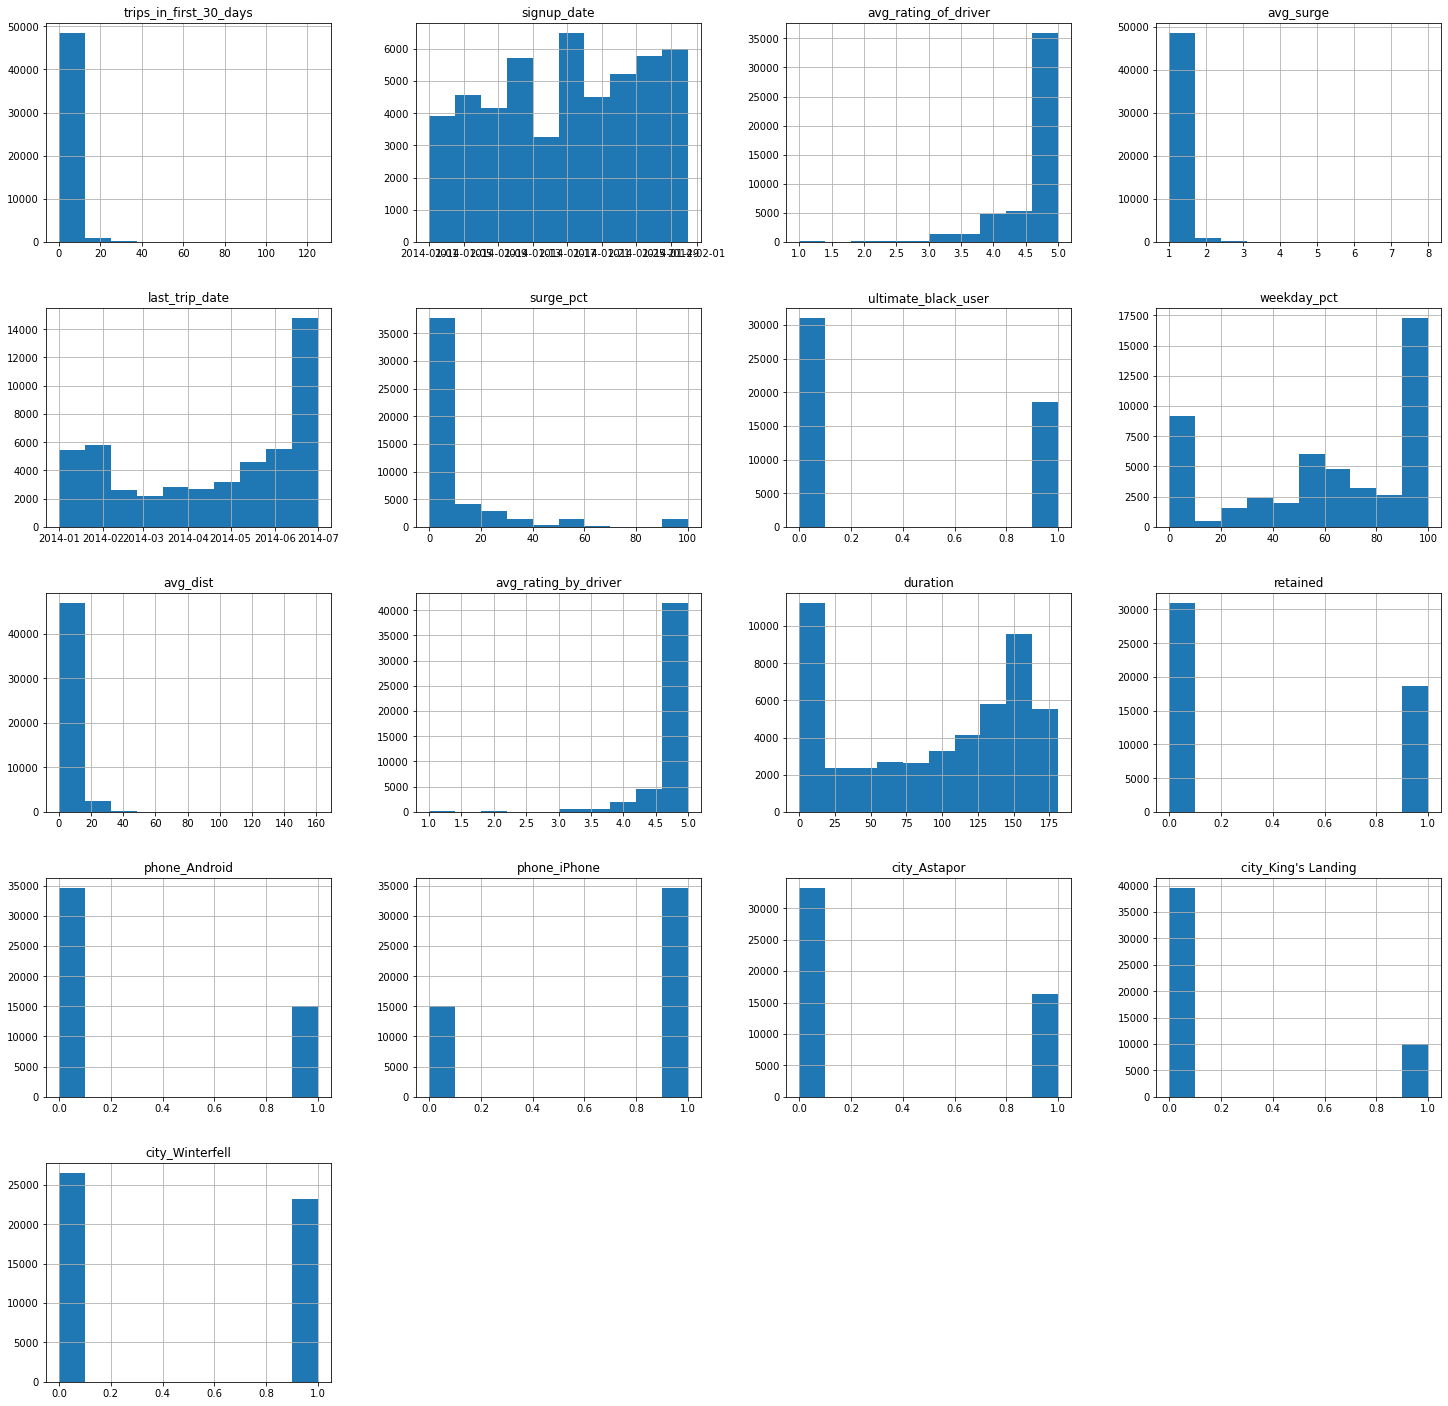

In [32]:
rider_data.hist(figsize=(25,25))

What is the fraction of users retained?

In [33]:
rider_data['retained'].value_counts()

0    30933
1    18671
Name: retained, dtype: int64

In [34]:
## Fraction retained
print('retained fraction', 36894/49604 )

retained fraction 0.7437706636561567


In [35]:
rider_data.dtypes

trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
surge_pct                        float64
ultimate_black_user                int64
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
duration                           int64
retained                           int64
phone_Android                      uint8
phone_iPhone                       uint8
city_Astapor                       uint8
city_King's Landing                uint8
city_Winterfell                    uint8
dtype: object

In [36]:
rider_data=rider_data.drop(columns=['signup_date', 'last_trip_date'])

In [48]:
#dividing the independent and dependent variables, X contains independent variables and y contains the target variable 
X = rider_data.drop(columns=['retained'])
y = rider_data['retained']

## Lets check Class Imbalance.

/Users/irtazaaslam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='retained', ylabel='count'>

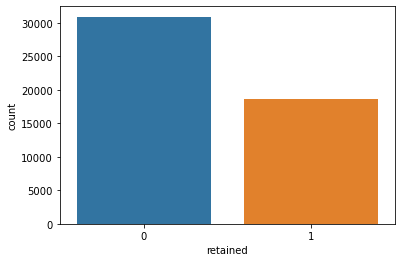

In [38]:
sns.countplot(rider_data['retained'])

We have an imbalanced class in our target variable. We can use techniques like SMOTE to handle class imbalance.

In [39]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X,y)

In [40]:
X_res.value_counts()

trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  duration  phone_Android  phone_iPhone  city_Astapor  city_King's Landing  city_Winterfell
1                       5.000000              1.00       0.0        0                    100.0        0.00      5.0                   1         1              0             0             0                    1                  4
                        4.601467              1.00       0.0        0                    100.0        0.00      5.0                   1         0              1             0             0                    1                  3
0                       4.601467              1.00       0.0        0                    100.0        1.37      5.0                   87        0              1             1             0                    0                  2
1                       1.000000              1.00       0.0        0                    

In [41]:
y_res.value_counts()

1    30933
0    30933
Name: retained, dtype: int64

In [42]:
rider_data.dtypes

trips_in_first_30_days      int64
avg_rating_of_driver      float64
avg_surge                 float64
surge_pct                 float64
ultimate_black_user         int64
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
duration                    int64
retained                    int64
phone_Android               uint8
phone_iPhone                uint8
city_Astapor                uint8
city_King's Landing         uint8
city_Winterfell             uint8
dtype: object

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [90]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modeling

So far we had done a good amount of Preprocessing and Feature Engineering. We can now create multiple models and get predictions.

### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred1=lr.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [93]:
print('Accuracy:',accuracy_score(y_test , y_pred1))
print('Precision:',precision_score(y_test , y_pred1))
print('Recall:',recall_score(y_test , y_pred1))
print('F1 Score:',f1_score(y_test , y_pred1))

Accuracy: 0.9620171326975917
Precision: 0.9564597846738442
Recall: 0.9687299550994227
F1 Score: 0.9625557680050988


### SVM

In [65]:
from sklearn import svm

In [66]:
svm = svm.SVC()

In [67]:
svm.fit(X_train, y_train)

SVC()

In [68]:
y_pred2 = svm.predict(X_test)

In [69]:
print('Accuracy:',accuracy_score(y_test , y_pred2))
print('Precision:',precision_score(y_test , y_pred2))
print('Recall:',recall_score(y_test , y_pred2))
print('F1 Score:',f1_score(y_test , y_pred2))

Accuracy: 0.9623403911427186
Precision: 0.9546170816262213
Recall: 0.9714560615779346
F1 Score: 0.9629629629629631


### KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier() 

In [75]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
y_pred3 = knn.predict(X_test)

In [77]:
print('Accuracy:',accuracy_score(y_test , y_pred3))
print('Precision:',precision_score(y_test , y_pred3))
print('Recall:',recall_score(y_test , y_pred3))
print('F1 Score:',f1_score(y_test , y_pred3))

Accuracy: 0.9352674963633425
Precision: 0.9162199417981314
Recall: 0.9592687620269403
F1 Score: 0.9372502937720328


### Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf = RandomForestClassifier()

In [82]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
y_pred4 = rf.predict(X_test)

In [85]:
print('Accuracy:',accuracy_score(y_test , y_pred4))
print('Precision:',precision_score(y_test , y_pred4))
print('Recall:',recall_score(y_test , y_pred4))
print('F1 Score:',f1_score(y_test , y_pred4))

Accuracy: 0.9641183125909164
Precision: 0.9559193954659949
Recall: 0.9737010904425915
F1 Score: 0.9647283126787417


We can further work on the models to get better results, by cross validating the model performances on test and training sets and can perform hyperparameter tuning by fining the best parameters, So far Random forest and SVC gives us the best results. I would choose Random forest as the winning model as it performs well in most machine learning problems due to it's ensamble technique. 

For this model we F1 Score would be the best evaluation metric as we want to reduce both FP and FN. 

The city wants to maximize the revenue and want to attract the users who are most likely to churn by providing toll reimbursements. 